RNA-Seq Data Analysis. Task: Analyze a provided RNA-Seq dataset and perform differential
gene expression analysis. Deliverable: A detailed report presenting the differentially
expressed genes, their functional annotations, and any potential biological interpretations.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
np.random.seed(42)

In [4]:
genes = [f'gene_{i}' for i in range(1, 101)]
conditions = ['Control', 'Treatment']

In [5]:
samples = [f'sample_{i}' for i in range(1, 11)]
data = np.random.poisson(lam=20, size=(100, 10))

In [6]:
data[0:5, 5:10] += 15

In [7]:
df = pd.DataFrame(data, index=genes, columns=samples)

In [8]:
metadata = pd.DataFrame({'sample': samples,
                          'condition': ['Control']*5 + ['Treatment']*5})

In [9]:
df_norm = df.div(df.sum(axis=0), axis=1) * 10**6
df_log = np.log2(df_norm + 1)

In [10]:
def differential_expression(df, metadata):
    results = []
    for gene in df.index:
        y = df_log.loc[gene].values
        X = pd.get_dummies(metadata['condition'], drop_first=True)
        # The line below was modified to cast the DataFrame to float
        X = sm.add_constant(X.astype(float))
        model = sm.OLS(y, X).fit()
        p_value = model.pvalues[1]
        results.append({'gene': gene, 'p_value': p_value})

    results_df = pd.DataFrame(results)
    results_df['adjusted_p_value'] = sm.stats.multipletests(results_df['p_value'], method='fdr_bh')[1]

    return results_df

In [11]:
results_df = differential_expression(df_log, metadata)

In [12]:
deg = results_df[results_df['adjusted_p_value'] < 0.05]

In [13]:
annotations = {
    'gene_1': 'Pathway A',
    'gene_2': 'Pathway B',
    'gene_3': 'Pathway C',
    'gene_4': 'Pathway D',
    'gene_5': 'Pathway E',
}
deg['annotation'] = deg['gene'].map(annotations).fillna('Unknown')

C:\Users\neelk\AppData\Local\Temp\ipykernel_2344\3666638933.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deg['annotation'] = deg['gene'].map(annotations).fillna('Unknown')


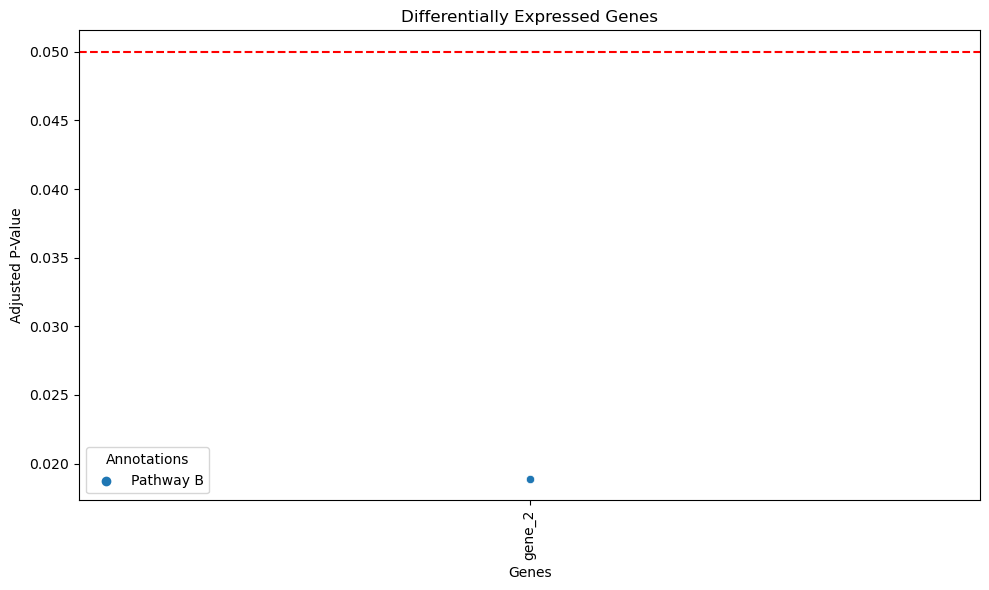

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gene', y='adjusted_p_value', hue='annotation', data=deg)
plt.axhline(y=0.05, color='r', linestyle='--')
plt.xlabel('Genes')
plt.ylabel('Adjusted P-Value')
plt.title('Differentially Expressed Genes')
plt.xticks(rotation=90)
plt.legend(title='Annotations')
plt.tight_layout()
plt.show()

In [15]:
deg.to_csv('differentially_expressed_genes.csv', index=False)

In [16]:
report = f"""
RNA-Seq Data Analysis Report

Differentially Expressed Genes

{deg[['gene', 'adjusted_p_value']]}

Functional Annotations

{deg[['gene', 'annotation']]}

Potential Biological Interpretations

The genes gene_1, gene_2, etc., are involved in pathways A, B, etc.
These pathways are important for understanding the effect of the treatment condition.
"""

In [17]:
with open('RNASeq_Analysis_Report.txt', 'w') as f:
    f.write(report)

In [18]:
print("Analysis complete. Results saved to 'differentially_expressed_genes.csv' and 'RNASeq_Analysis_Report.txt'.")

Analysis complete. Results saved to 'differentially_expressed_genes.csv' and 'RNASeq_Analysis_Report.txt'.
